In [1]:
import pandas as pd
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import time
from urllib.request import urlopen,Request
from bs4 import BeautifulSoup

In [2]:
# 인기순으로 한 첫 페이지만 수집됨
def web_crawling(label):
    result = []
    search_key = '탈모 '+ label
    url ='https://' + f'www.oliveyoung.co.kr/store/search/getSearchMain.do?query={search_key}&giftYn=N&t_page=통합검색&t_click=최근검색어&t_search_name={search_key}'

    # 기존에 다운받은 크롬브라우저용 드라이버와 현재 사용중인 크롬 브라우저 보다 버전이 낮아서 발생되는 문제 해결
    # ex오류 - 크롬드라이버 버전 87 / 크롬브라우저 버전 89
    driver = webdriver.Chrome(ChromeDriverManager().install())
    driver.get(url)

    time.sleep(0.2)

    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    # page_cnt = len(soup.find_all(title='Paging')) +1
    # page_cnt # 한페이지당 24개

    all_list = soup.find_all(class_='prd_info')

    # 검색결과 상품 총 개수
    all_cnt = len(all_list)

    # 상품명
    name_list = soup.find_all(class_='prd_thumb')

    # 가격
    price_list = soup.find_all(class_='tx_cur')

    if all_cnt > 24:
        all_cnt = 24
    for i in range(all_cnt):
        tmp = {'label' : label,
            'name' : name_list[i]['data-attr'][21:].split('^')[0],
            'price' : price_list[i].text.replace('원','').replace('~','').replace(',',''),
            'img' : all_list[i].img['src']
            }
        result.append(tmp)

    driver.close()
    return result


In [3]:
tmp = web_crawling('샴푸')
len(tmp), tmp

[WDM] - Downloading: 100%|██████████| 6.30M/6.30M [00:00<00:00, 11.7MB/s]


(24,
 [{'label': '샴푸',
   'name': '[대용량]라보에이치 탈모증상완화 샴푸[두피강화/두피쿨링] 750ml 중 택1',
   'price': '36000',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0016/A00000016179405ko.jpg?l=ko'},
  {'label': '샴푸',
   'name': '라보에이치 탈모증상완화 샴푸 750ml (두피강화)',
   'price': '36000',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0014/A00000014950114ko.jpg?l=ko'},
  {'label': '샴푸',
   'name': '[큐영PICK/대용량]닥터포헤어 폴리젠 탈모증상완화 샴푸 750ml 기획 (750ml+100ml*2추가증정)',
   'price': '26510',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0018/A00000018603721ko.jpg?l=ko'},
  {'label': '샴푸',
   'name': '라보에이치 탈모증상완화 샴푸 두피강화 (333ml+50ml)',
   'price': '14900',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0015/A00000015247510ko.jpg?l=ko'},
  {'label': '샴푸',
   'name': '[임시완 PICK/기획] 하아르 닥터모리엔 탈모토닉 100ml 기획 (+샴푸 75ml 증정)',
   'price': '34900',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0018/A0000001858

In [4]:
tmp2 = web_crawling('헤어토닉')
len(tmp2), tmp2

(23,
 [{'label': '헤어토닉',
   'name': '[1등 헤어토닉]달리프 클로렐라 헤어토닉 더블 기획(100ml+100ml)(탈모증상완화)',
   'price': '15800',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0018/A00000018061322ko.jpg?l=ko'},
  {'label': '헤어토닉',
   'name': '닥터포헤어 폴리젠 토닉 120ml',
   'price': '11400',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0011/A00000011820907ko.jpg?l=ko'},
  {'label': '헤어토닉',
   'name': '라우쉬 오리지널 헤어 팅크처 200ml 기획 (힘없는 모근 모발)',
   'price': '47000',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0001/A00000001389635ko.jpg?l=ko'},
  {'label': '헤어토닉',
   'name': '달리프 클로렐라 베러 루트 헤어토닉 더블 기획 (100ml+100ml)(탈모증상완화)',
   'price': '17100',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0013/A00000013577419ko.jpg?l=ko'},
  {'label': '헤어토닉',
   'name': '달리프 클로렐라 헤어토닉 100ml 단품/기획 [탈모증상완화/두피강화]',
   'price': '18000',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0012/A00000012557612ko.jpg?l=ko

In [5]:
tmp3 = web_crawling('에센스')
len(tmp3), tmp3

(24,
 [{'label': '에센스',
   'name': '닥터포헤어 폴리젠 토닉 120ml',
   'price': '11400',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0011/A00000011820907ko.jpg?l=ko'},
  {'label': '에센스',
   'name': '[염색애프터케어] 려 루트젠 탈모전문케어 두피에센스 80ml',
   'price': '19900',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0018/A00000018349506ko.jpg?l=ko'},
  {'label': '에센스',
   'name': '줄라이미 두피 에센스 콜드부스터 200ml+100ml (탈모완화도움)',
   'price': '17960',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0016/A00000016728414ko.jpg?l=ko'},
  {'label': '에센스',
   'name': '[한정수량] 라보에이치 탈모증상완화 사이다 쿨링 토닉 80ml',
   'price': '13300',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0018/A00000018506402ko.jpg?l=ko'},
  {'label': '에센스',
   'name': '라우쉬 오리지널 헤어 팅크처 200ml 기획 (힘없는 모근 모발)',
   'price': '47000',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0001/A00000001389635ko.jpg?l=ko'},
  {'label': '에센스',
   'name': '

In [6]:
tmp4 = web_crawling('세럼')
len(tmp4), tmp4

(13,
 [{'label': '세럼',
   'name': '클로란 퀴닌 에델바이스 두피 세럼 100ml(두피활력&모발강화)',
   'price': '32000',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0015/A00000015778519ko.jpg?l=ko'},
  {'label': '세럼',
   'name': '바이브랩 리바이브 테라피 헤어 브로우 래쉬 세럼 (헤어라인 겸용)',
   'price': '19900',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0018/A00000018343301ko.jpg?l=ko'},
  {'label': '세럼',
   'name': '달리프 세이지 댄드러프 비듬개선 헤어토닉 100ml (탈모증상완화)',
   'price': '10800',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0016/A00000016387919ko.jpg?l=ko'},
  {'label': '세럼',
   'name': '올라플렉스 No.6 본드 스무더 100ml',
   'price': '43000',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0018/A00000018535301ko.jpg?l=ko'},
  {'label': '세럼',
   'name': '올라플렉스 No.0 인텐시브 본드 빌딩 헤어 트리트먼트 155ml',
   'price': '43000',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0018/A00000018527901ko.jpg?l=ko'},
  {'label': '세럼',
   'name':

In [7]:
tmp5 = web_crawling('앰플')
len(tmp5), tmp5

(11,
 [{'label': '앰플',
   'name': '닥터포헤어 폴리젠 토닉 120ml',
   'price': '11400',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0011/A00000011820907ko.jpg?l=ko'},
  {'label': '앰플',
   'name': '바이브랩 리바이브 테라피 헤어 스칼프 앤 브로우 앰플',
   'price': '22800',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0018/A00000018343201ko.jpg?l=ko'},
  {'label': '앰플',
   'name': '달리프 클로렐라 베러 루트 헤어토닉 더블 기획 (100ml+100ml)(탈모증상완화)',
   'price': '17100',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0013/A00000013577419ko.jpg?l=ko'},
  {'label': '앰플',
   'name': '바이브랩 리바이브 테라피 헤어 스칼프 인핸싱폼',
   'price': '33100',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0018/A00000018343001ko.jpg?l=ko'},
  {'label': '앰플',
   'name': '달리프 클로렐라 헤어토닉 100ml 단품/기획 [탈모증상완화/두피강화]',
   'price': '18000',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0012/A00000012557612ko.jpg?l=ko'},
  {'label': '앰플',
   'name': '[앰플트리트먼

In [8]:
tmp6 = web_crawling('트리트먼트')
len(tmp6), tmp6

(24,
 [{'label': '트리트먼트',
   'name': '[한정기획] 라보에이치 탈모케어 스칼프 캡슐트리트먼트 2입 기획',
   'price': '16000',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0017/A00000017044511ko.jpg?l=ko'},
  {'label': '트리트먼트',
   'name': '클로란 퀴닌 에델바이스 두피 세럼 100ml(두피활력&모발강화)',
   'price': '32000',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0015/A00000015778519ko.jpg?l=ko'},
  {'label': '트리트먼트',
   'name': '닥터포헤어 폴리젠 씨솔트 스케일러 300g (탈모기능성)',
   'price': '13900',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0014/A00000014133805ko.jpg?l=ko'},
  {'label': '트리트먼트',
   'name': '라이아 탈모증상완화 프로알테인 단백질 샴푸400ml+트리트먼트200ml 기획세트',
   'price': '32000',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0017/A00000017802712ko.jpg?l=ko'},
  {'label': '트리트먼트',
   'name': '[두피케어]닥터포헤어 피토프레시 스칼프 스케일러 200ml',
   'price': '21000',
   'img': 'https://image.oliveyoung.co.kr/uploads/images/goods/10/0000/0016/A00000016310001ko.jpg?l=ko'},
  {

In [9]:
tmp_list = tmp + tmp2 + tmp3 + tmp4 + tmp5 + tmp6
len(tmp_list)

119

In [10]:
df = pd.DataFrame(tmp_list)
df

,label,name,price,img
0,샴푸,[대용량]라보에이치 탈모증상완화 샴푸[두피강화/두피쿨링] 750ml 중 택1,36000,https://image.oliveyoung.co.kr/uploads/images/...
1,샴푸,라보에이치 탈모증상완화 샴푸 750ml (두피강화),36000,https://image.oliveyoung.co.kr/uploads/images/...
2,샴푸,[큐영PICK/대용량]닥터포헤어 폴리젠 탈모증상완화 샴푸 750ml 기획 (750m...,26510,https://image.oliveyoung.co.kr/uploads/images/...
3,샴푸,라보에이치 탈모증상완화 샴푸 두피강화 (333ml+50ml),14900,https://image.oliveyoung.co.kr/uploads/images/...
4,샴푸,[임시완 PICK/기획] 하아르 닥터모리엔 탈모토닉 100ml 기획 (+샴푸 75m...,34900,https://image.oliveyoung.co.kr/uploads/images/...
...,...,...,...,...
114,트리트먼트,[두피케어] 닥터포헤어 피토테라피 트리트먼트 500ml,18900,https://image.oliveyoung.co.kr/uploads/images/...
115,트리트먼트,라보에이치 탈모케어 스칼프헤어 에센스 미스트팩 240ml [노워시 트리트먼트],18900,https://image.oliveyoung.co.kr/uploads/images/...
116,트리트먼트,보타믹스 위드우드 밸런싱 비건 헤어오일 100ml,17900,https://image.oliveyoung.co.kr/uploads/images/...
117,트리트먼트,닥터방기원 랩 탈모트리트먼트 1000ml,15900,https://image.oliveyoung.co.kr/uploads/images/...


In [38]:
re_df = re_df[((re_df['label'] == '세럼') & (re_df['name'].str.contains('세럼'))) | (re_df['label'] != '세럼')]
re_df = re_df[((re_df['label'] == '앰플') & (re_df['name'].str.contains('앰플'))) | (re_df['label'] != '앰플')]
re_df = re_df[((re_df['label'] == '트리트먼트') & (re_df['name'].str.contains('트리트먼트'))) | (re_df['label'] != '트리트먼트')]
re_df = re_df[((re_df['label'] == '에센스') & (re_df['name'].str.contains('에센스'))) | (re_df['label'] != '에센스')]
re_df['label'].value_counts()

샴푸       23
헤어토닉     23
트리트먼트    15
에센스       5
세럼        5
앰플        5
Name: label, dtype: int64

In [44]:
df_dup = re_df.drop_duplicates('name')
df_dup['label'] = df_dup['label'].replace('에센스', '세럼/앰플')
df_dup['label'] = df_dup['label'].replace('세럼', '세럼/앰플')
df_dup['label'] = df_dup['label'].replace('앰플', '세럼/앰플')
df_dup['label'].value_counts()

샴푸       23
헤어토닉     23
세럼/앰플    13
트리트먼트    12
Name: label, dtype: int64

In [45]:
df_dup = df_dup.reset_index(drop=True)
df_dup

,label,name,price,img
0,샴푸,[대용량]라보에이치 탈모증상완화 샴푸[두피강화/두피쿨링] 750ml 중 택1,36000,https://image.oliveyoung.co.kr/uploads/images/...
1,샴푸,라보에이치 탈모증상완화 샴푸 750ml (두피강화),36000,https://image.oliveyoung.co.kr/uploads/images/...
2,샴푸,[큐영PICK/대용량]닥터포헤어 폴리젠 탈모증상완화 샴푸 750ml 기획 (750m...,26510,https://image.oliveyoung.co.kr/uploads/images/...
3,샴푸,라보에이치 탈모증상완화 샴푸 두피강화 (333ml+50ml),14900,https://image.oliveyoung.co.kr/uploads/images/...
4,샴푸,[한정수량] 라보에이치 탈모증상완화 사이다 콜라보 (샴푸/토닉 택1),15900,https://image.oliveyoung.co.kr/uploads/images/...
...,...,...,...,...
66,트리트먼트,라우쉬 윌로우바크 트리트먼트 샴푸 200ml (두피 활력 샴푸),26000,https://image.oliveyoung.co.kr/uploads/images/...
67,트리트먼트,박준뷰티랩 헤어로스 LPP 트리트먼트 500ml (탈모증상완화),13900,https://image.oliveyoung.co.kr/uploads/images/...
68,트리트먼트,[두피케어] 닥터포헤어 피토테라피 트리트먼트 500ml,18900,https://image.oliveyoung.co.kr/uploads/images/...
69,트리트먼트,닥터방기원 랩 탈모트리트먼트 1000ml,15900,https://image.oliveyoung.co.kr/uploads/images/...


In [ ]:
tmp7 = web_crawling('머릿결')
tmp7_df = pd.DataFrame(tmp7)
result_df = pd.concat([df_dup,tmp7_df])
result_df['label'] = result_df['label'].replace('머릿결', '머릿결 관리')

In [69]:
import random
result_df['loc'] = '-'

for idx,row in result_df.iterrows():
    if row['label'] == '머릿결 관리':
        row['loc'] = row['loc'].replace('-', 'A-' + str(random.randint(500,1000)))

    elif row['label'] == '샴푸':
        row['loc'] = row['loc'].replace('-', 'B-' + str(random.randint(500,1000)))

    elif row['label'] == '헤어토닉':
        row['loc'] = row['loc'].replace('-', 'C-' + str(random.randint(500,1000)))

    elif row['label'] == '세럼/앰플':
        row['loc'] = row['loc'].replace('-', 'D-' + str(random.randint(500,1000)))

    elif row['label'] == '트리트먼트':
        row['loc'] = row['loc'].replace('-', 'E-' + str(random.randint(500,1000)))

result_df

,label,name,price,img,loc
0,샴푸,[대용량]라보에이치 탈모증상완화 샴푸[두피강화/두피쿨링] 750ml 중 택1,36000,https://image.oliveyoung.co.kr/uploads/images/...,B-923
1,샴푸,라보에이치 탈모증상완화 샴푸 750ml (두피강화),36000,https://image.oliveyoung.co.kr/uploads/images/...,B-826
2,샴푸,[큐영PICK/대용량]닥터포헤어 폴리젠 탈모증상완화 샴푸 750ml 기획 (750m...,26510,https://image.oliveyoung.co.kr/uploads/images/...,B-574
3,샴푸,라보에이치 탈모증상완화 샴푸 두피강화 (333ml+50ml),14900,https://image.oliveyoung.co.kr/uploads/images/...,B-653
4,샴푸,[한정수량] 라보에이치 탈모증상완화 사이다 콜라보 (샴푸/토닉 택1),15900,https://image.oliveyoung.co.kr/uploads/images/...,B-929
...,...,...,...,...,...
108,양호,엘라스틴 프로폴리테라 손상된모발용 샴푸500ml,22900,https://image.oliveyoung.co.kr/uploads/images/...,A-715
109,양호,[탈모케어]닥터포헤어 폴리젠 실크 샴푸 300ml,22000,https://image.oliveyoung.co.kr/uploads/images/...,A-724
110,양호,[한정기획]루톤 여성 두피용 림피오 리바이벌 캡슐크림13ml 6+2개입증정기획,23000,https://image.oliveyoung.co.kr/uploads/images/...,A-770
111,양호,탱글엔젤 런던부케 오일세럼 1+1 기획세트 100ml*2,32000,https://image.oliveyoung.co.kr/uploads/images/...,A-856


In [72]:
result_df.to_csv('./Data/product.csv')

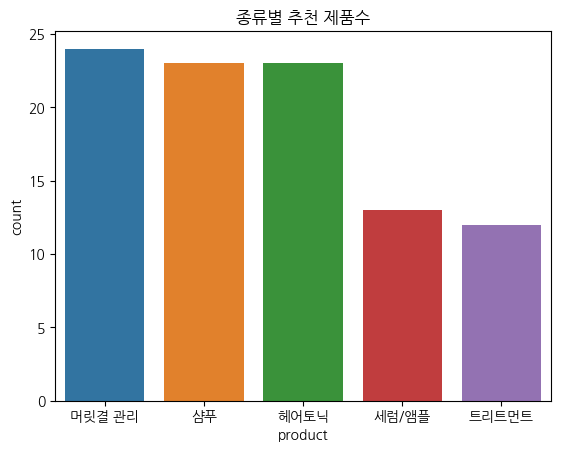

In [73]:
# 중복제거 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumGothic')
%matplotlib inline
# sns.set(style="whitegrid")

sns.countplot(x='label', data = result_df, order = result_df['label'].value_counts().index)
plt.title('종류별 추천 제품수')
plt.xlabel('product')
plt.show()

In [99]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
%matplotlib inline
import requests
from io import BytesIO
from PIL import Image
import time

result_df = result_df.astype({'price': 'int'})

# 다운받을 이미지 url
def img_show(url):
    # request.get 요청
    res = requests.get(url)

    #Img open
    request_get_img = Image.open(BytesIO(res.content))

    # 이미지 크기 조정
    image= request_get_img.resize((int(request_get_img.width/2), int(request_get_img.height/2)))
    return image
    # return request_get_img

def show_img(label):
    plt.figure(figsize=(11, 12))
    dataset = result_df[result_df['label'] == label].reset_index(drop=True)
    for i in range(4):
        plt.subplot(2, 2, i + 1)
        # plt.title(dataset['name'][i])
        plt.imshow(img_show(dataset['img'][i]))
        plt.xticks([])
        if len(dataset['name'][i]) > 30:
            tmp_num = dataset['name'][i].split(' ')
            plt.xlabel((' '.join(tmp_num[0:5]))+ '\n'+ (' '.join(tmp_num[5:])) + '\n\n가격 : ' + (format(dataset['price'][i], ',')) + '원\n' + '위치 : ' + dataset['loc'][i] )
        else:
            plt.xlabel(dataset['name'][i] + '\n\n가격 : ' + (format(dataset['price'][i], ',')) + '원\n' + '위치 : ' + dataset['loc'][i] )

        plt.yticks([])
    plt.show()

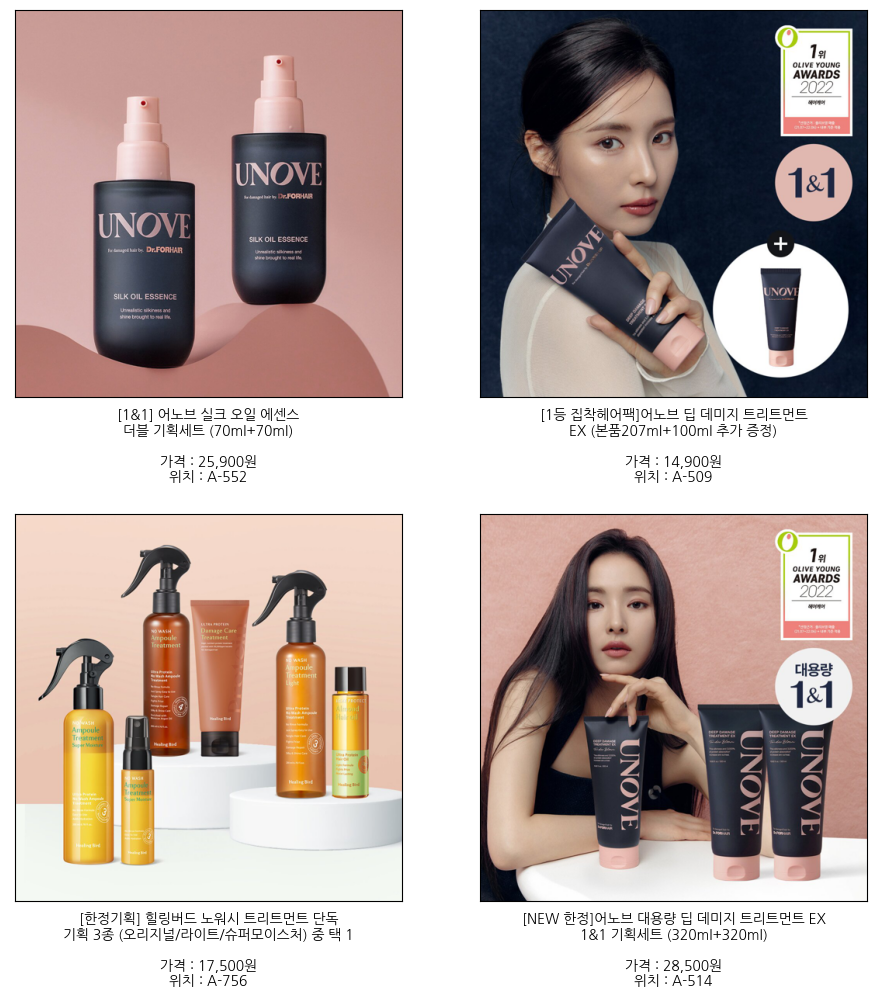

In [100]:
show_img('머릿결 관리')

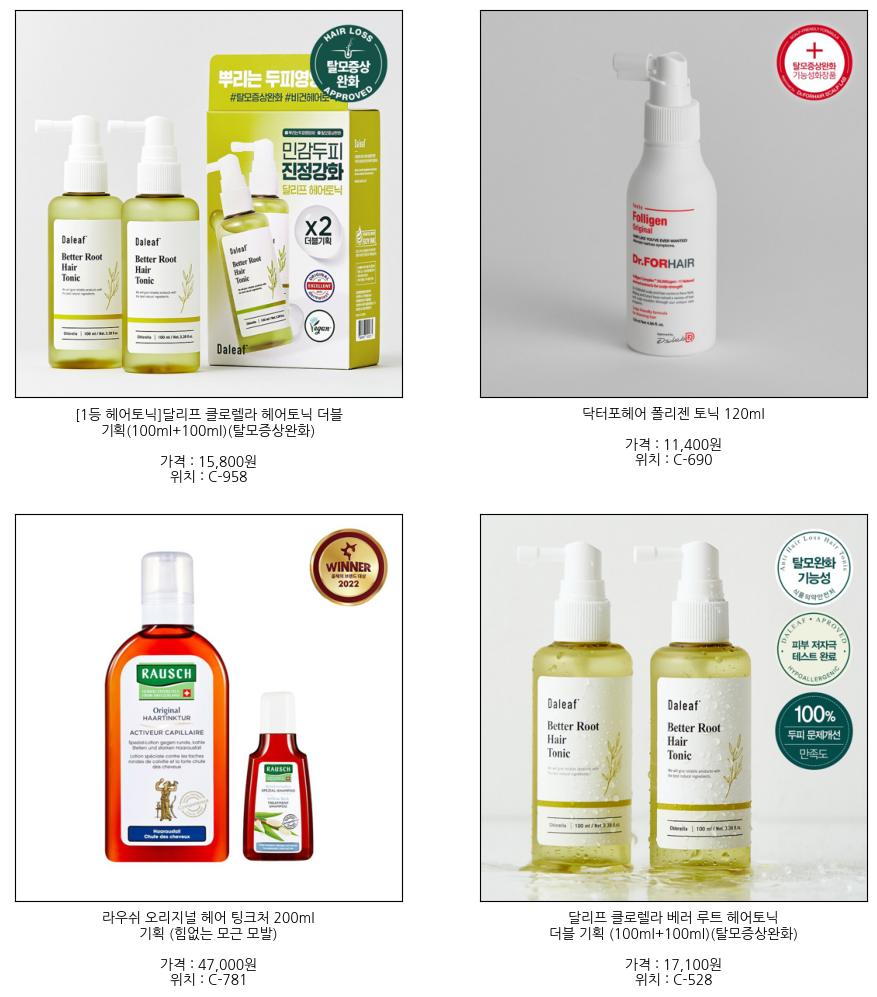

In [101]:
show_img('헤어토닉')

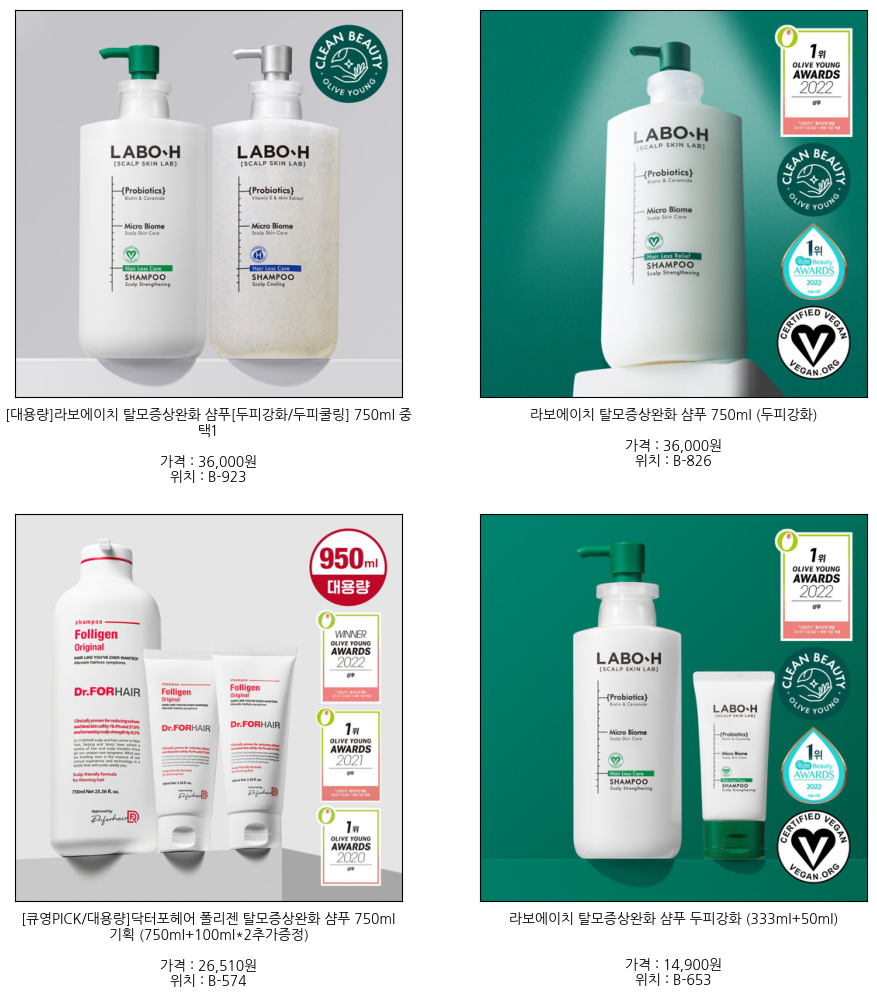

In [103]:
show_img('샴푸')